# EE16B: Discussion 10A

In [4]:
# import necessary libraries
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
%matplotlib inline

## Financial Analysis with PCA

You have recently joined the new hedge fund "Berkeley Hathaway Partners" as a quantitative analyst. Your job is to find a (small) basis that corresponds to the market, and to find the main stocks that make up this basis, eg. what stocks track the market best. 

Here, we have the [log return](https://quantivity.wordpress.com/2011/02/21/why-log-returns/) of 77 Fortune 500 stocks. We want to find the principal components of the market using our newly acquired knowledge of PCA.

In [42]:
# Load stock data
stock_data = spio.loadmat('77Stocks.mat')
log_return = stock_data['LogReturn']
ticker = stock_data['StockTicker']

## Step 0: investigate the data
What is the shape of data? How many stocks are there? And how many timestamps?  
Plot the data. Can you interpret any other information from the plot?

shape of log return: (77, 503)
number of stocks: 77
number of timestamps: 503


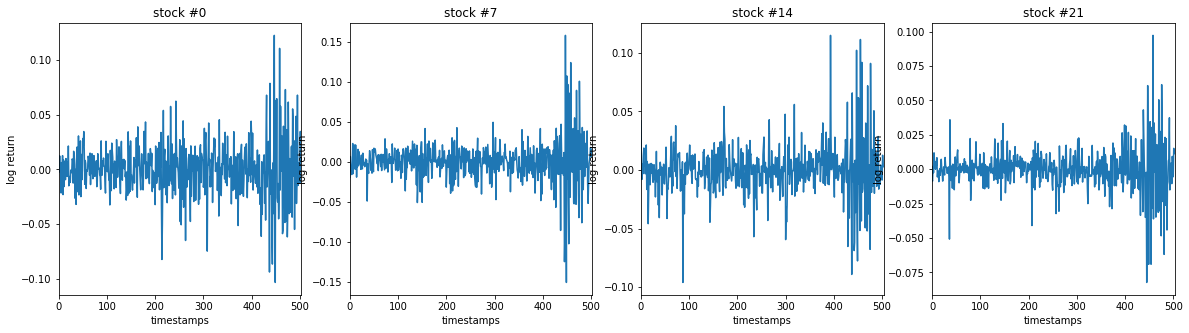

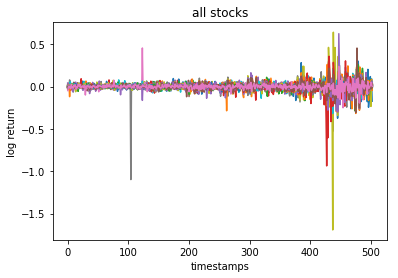

In [43]:
# investigate the shape
print("shape of log return:", log_return.shape)
num_stocks, num_timestamps = log_return.shape
print("number of stocks:", num_stocks)
print("number of timestamps:", num_timestamps)

# plot a few data slices
idx = [0, 7, 14, 21]
plt.figure(1, figsize=(20, 5))
for i, j in enumerate(idx):
    plt.subplot(141+i)
    plt.xlim([0, num_timestamps])
    plt.xlabel("timestamps")
    plt.ylabel("log return")
    plt.title("stock #%d"%(j))
    plt.plot(log_return[j]);
    

# Plot all log returns
plt.figure(2)
plt.xlabel("timestamps")
plt.ylabel("log return")
plt.title("all stocks")
plt.plot(log_return.T);

## Step 1: zero-center the data
Since we are interested in the trend of each stock, we are interested in **rows** of the matrix.

In [44]:
log_return.shape

(77, 503)

In [45]:
### your code here ###
log_return_centered = log_return - np.mean(log_return, axis=0)

# verify that the data is zero-centered
# the mean should be now zero (less than e-16)
print(np.linalg.norm(np.mean(log_return_centered, axis=0)))

7.73984248358e-17


## Step 2: Calculate the Covariance matrix

In [46]:
# Compute the covariance matrix S
### your code here ###
S = 

## Step 3: compute eigen-decomposition, and compare eigenvalues
Plot the eigenvalues in one plot. What can you say about the plot? We want to decide how many basis vectors are really needed to explain the data. How many significant dimensions are there in the data? 

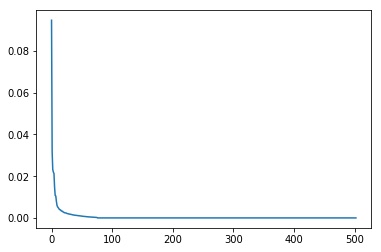

In [47]:
#compute eigenvalues and eigenvectors of S
### your code here ###
D, P = 

#sort eigenvectors and eigenvalues so that larger eigenvalues come first
Dinds = D.argsort()
D = D[Dinds[::-1]]
P = P[:,Dinds[::-1]]

#plot eigenvalues in descending order
plt.plot(D)

### Extra: 
Another way to show how much variance the Principal components capture is to plot the cumulative sum of eigenvalues

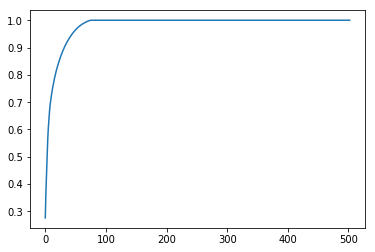

In [48]:
# Plot the cumulative sum of singular values squared
total_explained_variance = np.cumsum(D) / np.sum(D)

plt.plot(total_explained_variance);

From this graph, we can tell that we can capture more than 70% of the variance of the dataset with a basis of 10 rather than 77. This justifies the idea of "the market average moves the market". 

## Step 4: transform the data matrix
The (1st) principal component is the direction that captures most of the variance of data. In our case, the largest right singular vector captures most of the variance of stock trends. Project the data matrix along this direction and plot the result. What do you see? Is the vector relatively even across all of the stocks, or do a few stocks hold the majority of the weight?

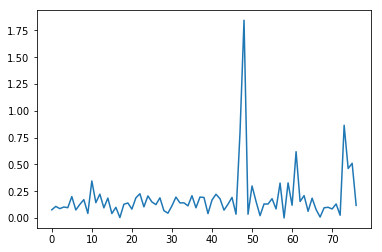

In [52]:
### your code here ###
v_1 = 
projection = 
plt.plot(np.abs(projection))

Now, what are the stocks that make up the majority of the largest singular vector?  Find the top 5 stocks of the largest singular vector.

In [9]:
#Sort by arguments (ascending) and get the top 5 stocks
ticker[np.argsort(np.abs(projection))][::-1][:5]

array([[array(['FTU'], 
      dtype='<U3')],
       [array(['AIG'], 
      dtype='<U3')],
       [array(['FABC'], 
      dtype='<U4')],
       [array(['MER'], 
      dtype='<U3')],
       [array(['PA'], 
      dtype='<U2')]], dtype=object)

**<font color="red">What do all of these stocks have in common? Look up the stock ticker symbols, they should all be of the same industry**